# Add a Custom Check

It is possible to extend deepchecks by implementing custom checks. This enables you to have your own logic of metrics or validation, or even just to display your own graph using deepchecks' suite.

- [Check Structure](#Check-Structure)
- [Write a Basic Check](#Write-a-Basic-Check)
- [Check Display](#Check-Display)

## Check Structure 
Each check consists of 3 main parts:
- Return value
- Display
- Conditions

This guide will demonstrate how to implement a Check with a return value and display, for addding a condition see working with conditions (LINK)

## Write a Basic Check

Let's implement a check for comparing the sizes of the test and the train datasets.

The first step is to create check class, which inherits from a base check class. Each base check is differed by its run method signature, read more about all types (LINK). In this case we will use `TrainTestBaseCheck`, which is used to compare between the test and the train datasets. After creating the basic class with the `run` function we will write our check logic inside it.

*Good to know: the return value of a check can be any object, a number, dictionary, string, etc...*

In [1]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset


class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""
    
    def run(self, train_dataset: Dataset, test_dataset: Dataset, model=None) -> CheckResult:
        ## Check logic
        train_size = train_dataset.n_samples
        test_size = test_dataset.n_samples
        
        ## Return value as check result
        return_value = {'train_size': train_size, 'test_size': test_size}
        return CheckResult(return_value)

Hooray! we just implemented a custom check. Now let's create two Datasets and try to run it:

In [2]:
import pandas as pd

# We'll use dummy data for the purpose of this demonstration
train_dataset = Dataset(pd.DataFrame(data={'x': [1,2,3,4,5,6,7,8,9]}), label=None)
test_dataset = Dataset(pd.DataFrame(data={'x': [1,2,3]}), label=None)

result = DatasetSizeComparison().run(train_dataset, test_dataset)
result

Dataset Size Comparison Check which compares the sizes of train and test datasets. Additional Outputs ✓ Nothing found

Our check ran successfully but we got the print "Nothing found". This is because we haven't defined to the check anything to display, so the default behavior is to print "Nothing found". In order to access the value that we have defined earlier we can use the "value" property on the result.

In [3]:
result.value

{'train_size': 9, 'test_size': 3}

To see code references for more complex checks (that can receive parameters etc.), check out any of your favorite checks from our API Reference (LINK).

## Check Display

Most of the times we will want our checks to have a visual display that will quickly summarize the check result. We can pass objects for display to the CheckResult. Objects for display should be of type: html string, dataframe or a function that plots a graph. Let's define a graph that will be displayed using `matplotlib`. In order to use `matplotlib` we have to implement the code inside a function and not call it directly in the check, this is due to architectural limitations of `matplotlib`.

*Good to know: `display` can receive a single object to display or a list of objects*

In [4]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset
import matplotlib.pyplot as plt

class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""
    
    def run(self, train_dataset: Dataset, test_dataset: Dataset, model=None) -> CheckResult:
        ## Check logic
        train_size = train_dataset.n_samples
        test_size = test_dataset.n_samples
        
        ## Create the check result value
        sizes = {'Train': train_size, 'Test': test_size}
        sizes_df_for_display =  pd.DataFrame(sizes, index=['Size'])
        
        ## Display function of matplotlib graph:
        def graph_display():
            plt.bar(sizes.keys(), sizes.values(), color='green')
            plt.xlabel("Dataset")
            plt.ylabel("Size")
            plt.title("Datasets Size Comparison")
        
        return CheckResult(sizes, display=[sizes_df_for_display, graph_display])

Let check it out:

,Train,Test
Size,9,3


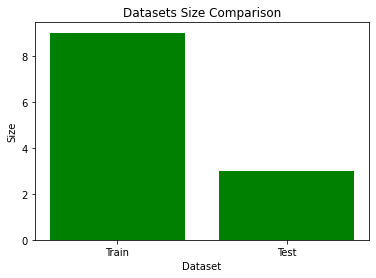

In [5]:
DatasetSizeComparison().run(train_dataset, test_dataset)

## Voila!

Now we have a check that prints a graph and has a value. We can add this check to any Suite and it will run within it.

The next possible step is to implement a condition, which will allow us to give the check result a pass / fail mark. To do so, check out the following guide (LINK)

## Base Checks Types

There are a number of different `BaseCheck` Classes to inherit from. Each base check is differed by the objects it requires in order to run, and their sole difference is the `run` method's signature.

|Check|`run` Signature|Notes|
|-----|---------------|-----|
|`SingleDatasetBaseCheck`|`run(self, dataset, model=None)`|When used in a suite you can choose whether to run on the test dataset, the train dataset or on both|
|`TrainTestBaseCheck`|`run(self, train_dataset, test_dataset, model=None)`||
|`ModelOnlyBaseCheck`|`run(self, model)`||